In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:01<00:00, 157MB/s]
100% 163M/163M [00:01<00:00, 140MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2818.jpg', 'with_mask_2022.jpg', 'with_mask_1972.jpg', 'with_mask_1592.jpg', 'with_mask_1667.jpg']
['with_mask_3093.jpg', 'with_mask_1096.jpg', 'with_mask_1653.jpg', 'with_mask_1812.jpg', 'with_mask_1507.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3387.jpg', 'without_mask_2972.jpg', 'without_mask_2723.jpg', 'without_mask_2651.jpg', 'without_mask_2848.jpg']
['without_mask_3513.jpg', 'without_mask_539.jpg', 'without_mask_1263.jpg', 'without_mask_2682.jpg', 'without_mask_2173.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

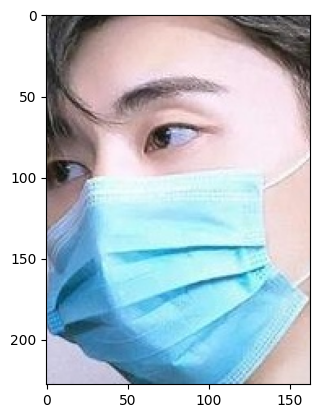

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

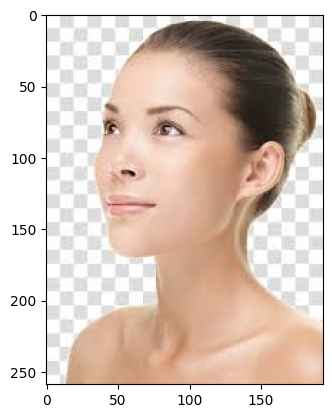

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[ 19,  20,  25],
        [ 19,  20,  25],
        [ 19,  20,  25],
        ...,
        [ 16,  17,  22],
        [ 17,  18,  23],
        [ 17,  18,  23]],

       [[ 18,  19,  24],
        [ 18,  19,  24],
        [ 18,  19,  24],
        ...,
        [ 16,  17,  22],
        [ 16,  17,  22],
        [ 16,  17,  22]],

       [[ 18,  19,  24],
        [ 18,  19,  24],
        [ 18,  19,  24],
        ...,
        [ 17,  18,  23],
        [ 16,  17,  22],
        [ 16,  17,  22]]], dtype=uint8)
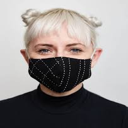

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[206, 201, 198],
        [206, 201, 198],
        [206, 201, 198],
        ...,
        [203, 198, 195],
        [203, 198, 195],
        [203, 198, 195]],

       [[206, 201, 198],
        [206, 201, 198],
        [206, 201, 198],
        ...,
        [203, 198, 195],
        [203, 198, 195],
        [203, 198, 195]],

       [[206, 201, 198],
        [206, 201, 198],
        [206, 201, 198],
        ...,
        [203, 198, 195],
        [203, 198, 195],
        [203, 198, 195]],

       ...,

       [[211, 205, 215],
        [207, 203, 215],
        [205, 203, 217],
        ...,
        [188, 189, 206],
        [191, 190, 205],
        [206, 204, 216]],

       [[212, 206, 216],
        [208, 204, 216],
        [205, 203, 216],
        ...,
        [188, 188, 206],
        [188, 187, 203],
        [197, 194, 209]],

       [[214, 208, 217],
        [209, 204, 217],
        [204, 202, 215],
        ...,
        [187, 188, 206],
        [187, 186, 202],
        [189, 186, 202]]], dtype=uint8)
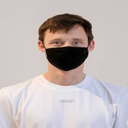

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.80784314, 0.78823529, 0.77647059],
        [0.80784314, 0.78823529, 0.77647059],
        [0.80784314, 0.78823529, 0.77647059],
        ...,
        [0.79607843, 0.77647059, 0.76470588],
        [0.79607843, 0.77647059, 0.76470588],
        [0.79607843, 0.77647059, 0.76470588]],

       [[0.80784314, 0.78823529, 0.77647059],
        [0.80784314, 0.78823529, 0.77647059],
        [0.80784314, 0.78823529, 0.77647059],
        ...,
        [0.79607843, 0.77647059, 0.76470588],
        [0.79607843, 0.77647059, 0.76470588],
        [0.79607843, 0.77647059, 0.76470588]],

       [[0.80784314, 0.78823529, 0.77647059],
        [0.80784314, 0.78823529, 0.77647059],
        [0.80784314, 0.78823529, 0.77647059],
        ...,
        [0.79607843, 0.77647059, 0.76470588],
        [0.79607843, 0.77647059, 0.76470588],
        [0.79607843, 0.77647059, 0.76470588]],

       ...,

       [[0.82745098, 0.80392157, 0.84313725],
        [0.81176471, 0.79607843, 0.84313725],
        [0.80392157, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.4662 - acc: 0.7861 - val_loss: 0.2830 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2950 - acc: 0.8902 - val_loss: 0.2362 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2332 - acc: 0.9053 - val_loss: 0.2039 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1923 - acc: 0.9255 - val_loss: 0.2082 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1688 - acc: 0.9329 - val_loss: 0.1892 - val_acc: 0.9190


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1958 - acc: 0.9232
Test Accuracy = 0.9232296347618103


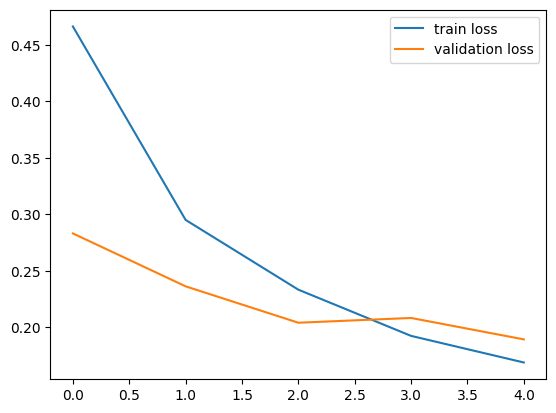

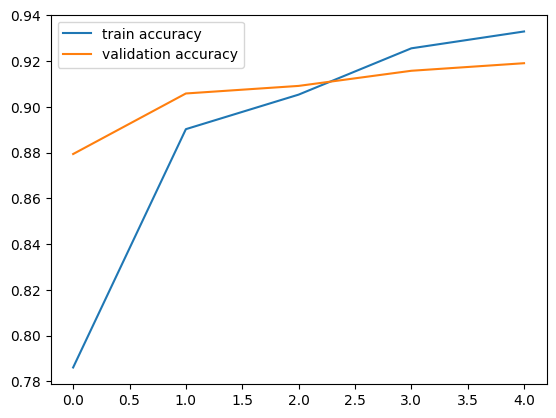

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_100.jpg


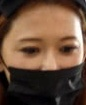

1/1 [==============================] - 0s 26ms/step
[[0.5275842 0.5785625]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


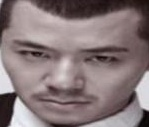

1/1 [==============================] - 0s 18ms/step
[[0.56941426 0.5026145 ]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
model.save('mask_detection_model.h5')